In [63]:
# import libraries
import numpy as np
from pandas import read_csv , set_option
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix 

In [19]:
# load Data
filename = "sonar.all-data.csv"
data = read_csv(filename , header = None)

In [20]:
# shape
data.shape

(208, 61)

In [21]:
# types
set_option('display.max_rows', 500)
print(data.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


In [22]:
# head
pd.options.display.float_format = '{:.3f}'.format
set_option('display.width', 100)
print(data.head(20))

      0     1     2     3     4     5     6     7     8     9   ...    51    52    53    54    55  \
0  0.020 0.037 0.043 0.021 0.095 0.099 0.154 0.160 0.311 0.211  ... 0.003 0.006 0.016 0.007 0.017   
1  0.045 0.052 0.084 0.069 0.118 0.258 0.216 0.348 0.334 0.287  ... 0.008 0.009 0.005 0.009 0.019   
2  0.026 0.058 0.110 0.108 0.097 0.228 0.243 0.377 0.560 0.619  ... 0.023 0.017 0.009 0.018 0.024   
3  0.010 0.017 0.062 0.021 0.021 0.037 0.110 0.128 0.060 0.126  ... 0.012 0.004 0.015 0.009 0.007   
4  0.076 0.067 0.048 0.039 0.059 0.065 0.121 0.247 0.356 0.446  ... 0.003 0.005 0.011 0.011 0.002   
5  0.029 0.045 0.028 0.017 0.038 0.099 0.120 0.183 0.210 0.304  ... 0.004 0.001 0.004 0.001 0.009   
6  0.032 0.096 0.132 0.141 0.167 0.171 0.073 0.140 0.208 0.351  ... 0.020 0.025 0.013 0.007 0.014   
7  0.052 0.055 0.084 0.032 0.116 0.092 0.103 0.061 0.146 0.284  ... 0.008 0.012 0.004 0.012 0.010   
8  0.022 0.037 0.048 0.048 0.065 0.059 0.075 0.010 0.068 0.149  ... 0.015 0.013 0.015 0.006

In [23]:
# Description
set_option('display.precision', 3)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000
mean,0.029,0.038,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,0.013,0.011,0.011,0.009,0.008,0.008,0.008,0.008,0.007
std,0.023,0.033,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,0.010,0.007,0.007,0.007,0.006,0.006,0.006,0.006,0.005
min,0.002,0.001,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,0.001,0.001,0.001,0.001,0.000,0.000,0.000,0.000,0.001
25%,0.013,0.016,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,0.007,0.005,0.005,0.004,0.004,0.004,0.004,0.004,0.003
50%,0.023,0.031,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,0.011,0.010,0.009,0.007,0.007,0.006,0.006,0.006,0.005
75%,0.036,0.048,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,0.017,0.015,0.015,0.012,0.011,0.010,0.010,0.010,0.009
max,0.137,0.234,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,0.071,0.039,0.035,0.045,0.039,0.035,0.044,0.036,0.044


In [24]:
data.groupby(60).size()

60
M    111
R     97
dtype: int64

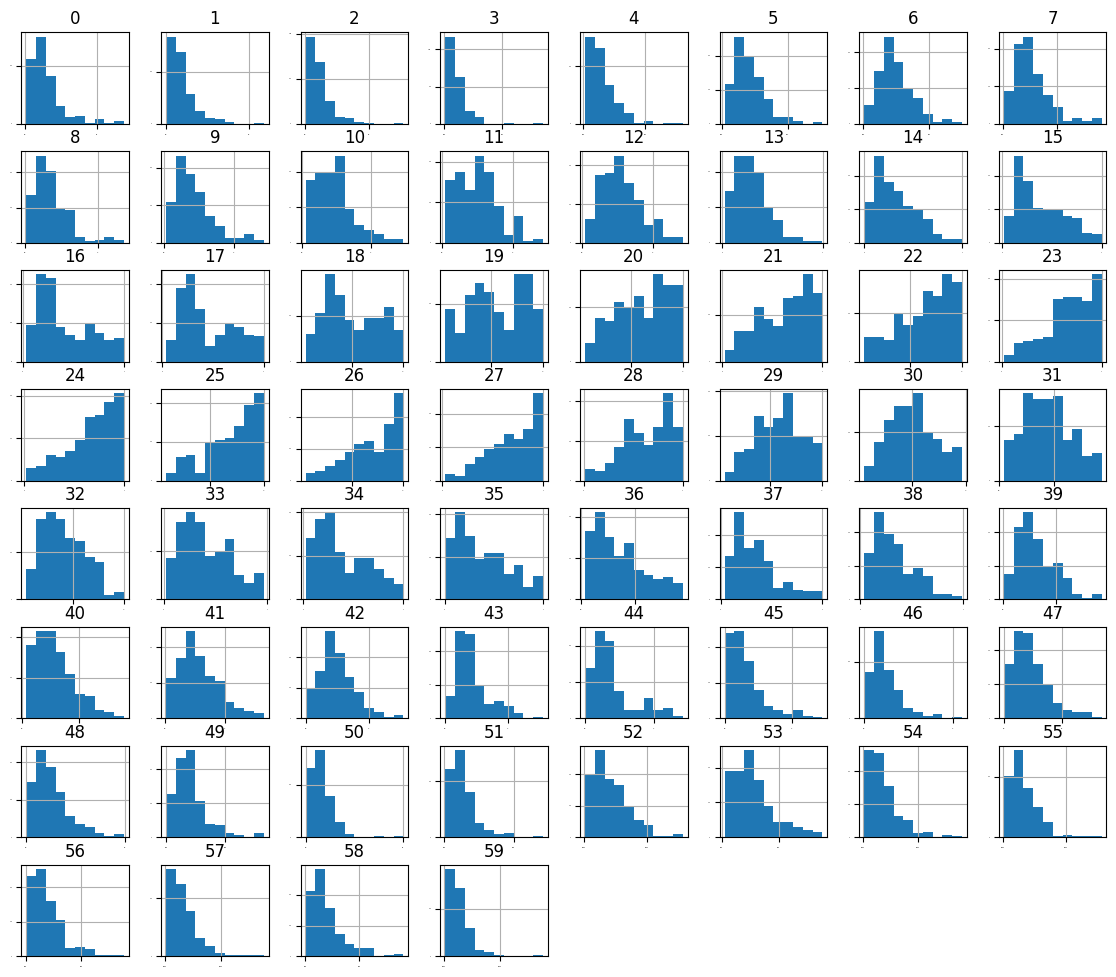

In [25]:
# histagram
data.hist(sharex = False, sharey=False, xlabelsize = 1 , ylabelsize = 1 , figsize = (14,12))
plt.show()

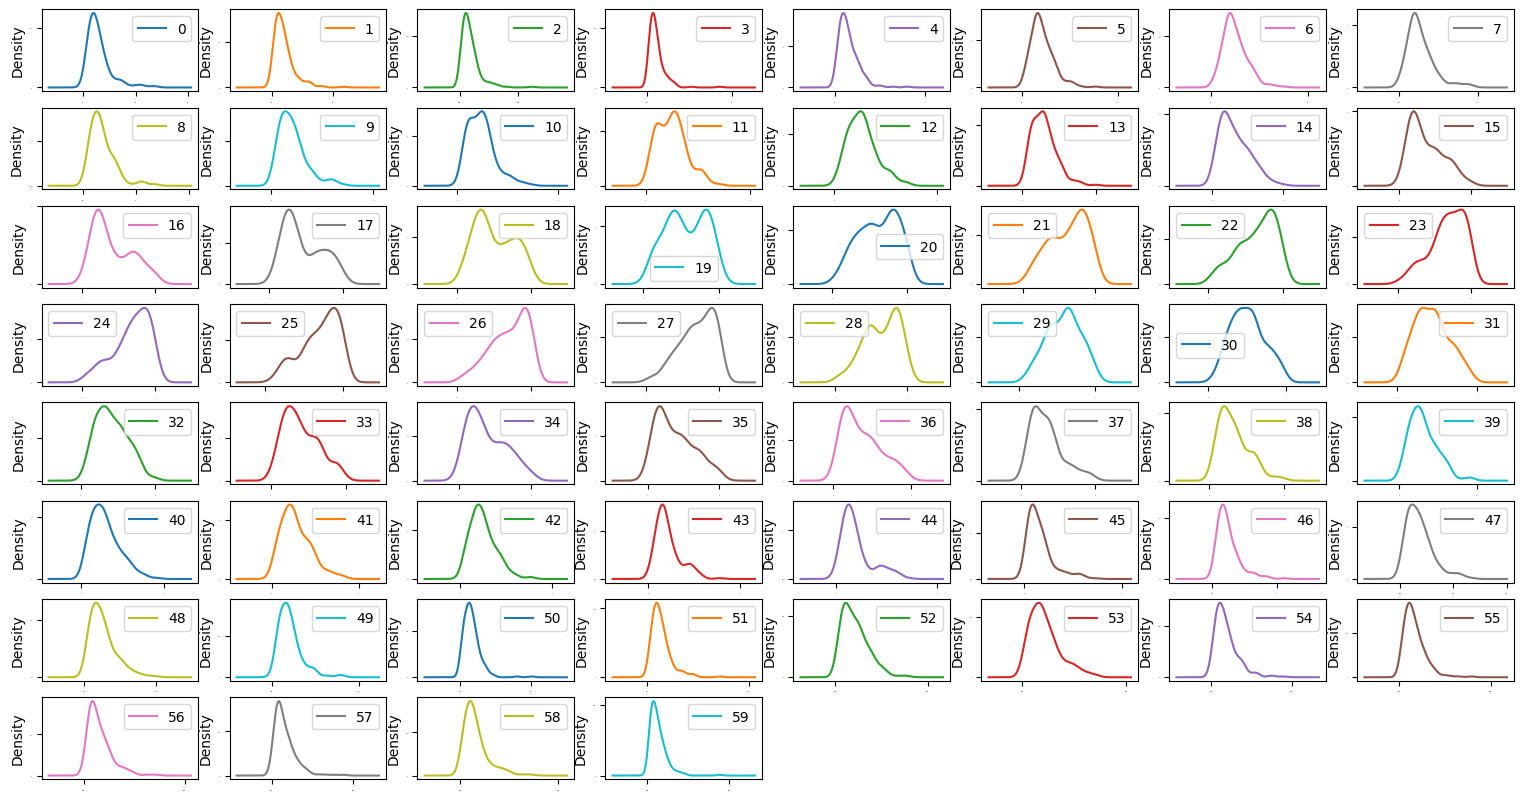

In [26]:
# Density
data.plot(kind = "density", subplots= True, sharex = False, sharey = False, legend=True, fontsize =1 , layout = (8,8) , figsize=(19,10))
plt.show()

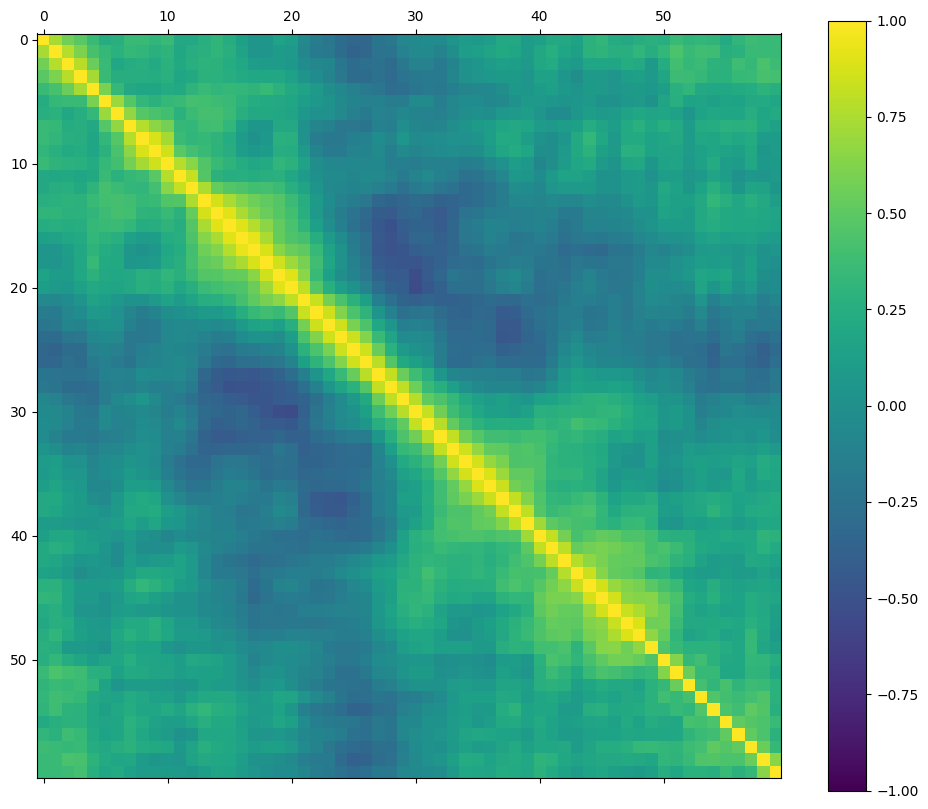

In [27]:
# correlation matrix
data_numeric = data.select_dtypes(include=[float , int])
correlations = data_numeric.corr(method = "pearson")
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111)

cax = ax.matshow(correlations , vmin = -1 , vmax = 1)
fig.colorbar(cax)
plt.show()

In [28]:
# split out validation dataset
array = data.values

X = array[: , 0:60].astype(float)
Y = array[: , 60]

validation_size = 0.20
seed = 7

X_train , X_validation , Y_train , Y_validation = train_test_split(X,Y, test_size = validation_size , random_state=seed)



In [29]:
# Test option and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [30]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("GB", GaussianNB()))
models.append(("SVC", SVC()))

results = []
names = []
for name , model in models:
    kfold = KFold(n_splits = num_folds , random_state = seed , shuffle = True)
    cv_results = cross_val_score(model, X_train , Y_train , cv=kfold , scoring=scoring)
    names.append(name)
    results.append(cv_results)
    msg = "%s : %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)

LR : 0.771691 (0.091002)
KNN : 0.758824 (0.106417)
LDA : 0.778676 (0.093570)
CART : 0.727574 (0.112975)
GB : 0.682721 (0.136040)
SVC : 0.765074 (0.087519)


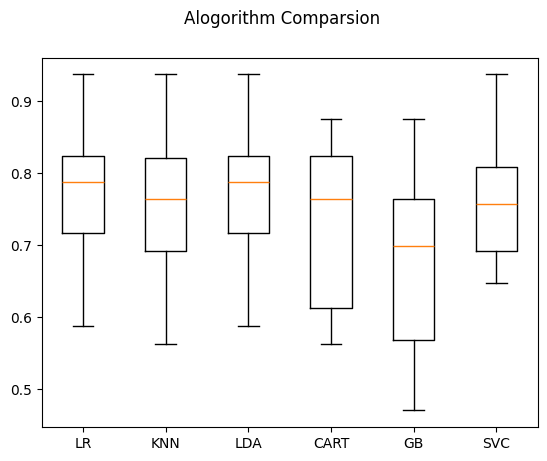

In [32]:
# Alogorithm Comparsion
fig = plt.figure()
fig.suptitle("Alogorithm Comparsion")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [43]:
pipelines = []
pipelines.append(("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LogisticRegression())])))
pipelines.append(("ScaledLDA", Pipeline([("Scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())])))
pipelines.append(("ScaledKNN", Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsClassifier())])))
pipelines.append(("ScaledCART", Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeClassifier())])))
pipelines.append(("ScaledGB", Pipeline([("Scaler", StandardScaler()), ("GB", GaussianNB())])))
pipelines.append(("ScaledSVC", Pipeline([("Scaler", StandardScaler()), ("SVC", SVC())])))

results = []
names = []
scoring = 'accuracy'
for name , model in pipelines:
    kfold = KFold(n_splits = num_folds , random_state = seed , shuffle = True)
    cv_results = cross_val_score(model, X_train , Y_train , cv=kfold , scoring=scoring)
    names.append(name)
    results.append(cv_results)
    msg = "%s : %f (%f)" % (name ,cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR : 0.754412 (0.067926)
ScaledLDA : 0.778676 (0.093570)
ScaledKNN : 0.808456 (0.107996)
ScaledCART : 0.734559 (0.082057)
ScaledGB : 0.682721 (0.136040)
ScaledSVC : 0.826103 (0.081814)


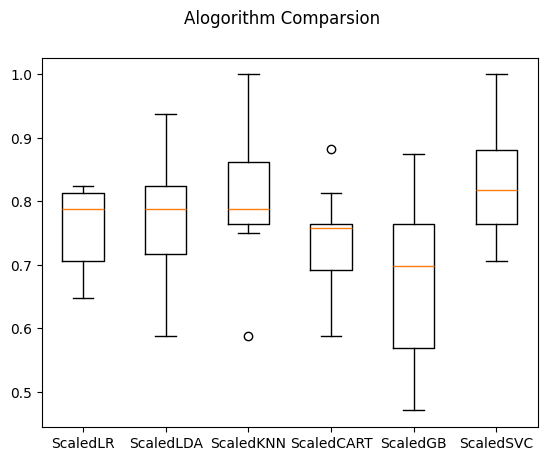

In [44]:
# Alogorithm Comparsion
fig = plt.figure()
fig.suptitle("Alogorithm Comparsion")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [50]:
# KNN Algorithm Tuning

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23])
kfold = KFold(n_splits = num_folds , random_state = seed , shuffle = True)
param_grid = dict(n_neighbors = k_values)
model = KNeighborsClassifier()

grid = GridSearchCV(estimator = model , param_grid = param_grid , cv=kfold , scoring=scoring)
grid_result = grid.fit(rescaledX , Y_train)
print("Best : %f using %s"% (grid_result.best_score_ , grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean , stdev , param in zip(means , stds , params):
    print("%f (%f) with : %r"% (mean , stdev , param))

Best : 0.836029 using {'n_neighbors': np.int64(1)}
0.836029 (0.079487) with : {'n_neighbors': np.int64(1)}
0.813603 (0.088021) with : {'n_neighbors': np.int64(3)}
0.796324 (0.110871) with : {'n_neighbors': np.int64(4)}
0.814338 (0.096870) with : {'n_neighbors': np.int64(5)}
0.747426 (0.123499) with : {'n_neighbors': np.int64(6)}
0.777574 (0.120387) with : {'n_neighbors': np.int64(7)}
0.735294 (0.106186) with : {'n_neighbors': np.int64(8)}
0.730147 (0.099376) with : {'n_neighbors': np.int64(9)}
0.741544 (0.073970) with : {'n_neighbors': np.int64(11)}
0.729412 (0.093850) with : {'n_neighbors': np.int64(12)}
0.710662 (0.105829) with : {'n_neighbors': np.int64(13)}
0.711029 (0.097204) with : {'n_neighbors': np.int64(14)}
0.723162 (0.080983) with : {'n_neighbors': np.int64(15)}
0.704779 (0.075328) with : {'n_neighbors': np.int64(16)}
0.698897 (0.072669) with : {'n_neighbors': np.int64(17)}
0.698897 (0.091195) with : {'n_neighbors': np.int64(18)}
0.710662 (0.091337) with : {'n_neighbors': np

In [57]:
# SVc Algorithm Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1 , 0.3 , 0.5 , 0.7 , 0.9 , 1.0 , 1.3 , 1.5 , 1.7 , 2.0]
kernel_values = ['linear', 'poly', 'rbf','sigmoid']


kfold = KFold(n_splits = num_folds , random_state = seed , shuffle = True)
param_grid = dict(C = c_values , kernel = kernel_values)
model = SVC()

grid = GridSearchCV(estimator = model , param_grid = param_grid , cv=kfold , scoring=scoring)
grid_result = grid.fit(rescaledX , Y_train)
print("Best : %f using %s"% (grid_result.best_score_ , grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean , stdev , param in zip(means , stds , params):
    print("%f (%f) with : %r"% (mean , stdev , param))

Best : 0.850000 using {'C': 1.7, 'kernel': 'rbf'}
0.748529 (0.069953) with : {'C': 0.1, 'kernel': 'linear'}
0.582721 (0.127062) with : {'C': 0.1, 'kernel': 'poly'}
0.601103 (0.184435) with : {'C': 0.1, 'kernel': 'rbf'}
0.712868 (0.116579) with : {'C': 0.1, 'kernel': 'sigmoid'}
0.754412 (0.082337) with : {'C': 0.3, 'kernel': 'linear'}
0.644118 (0.099873) with : {'C': 0.3, 'kernel': 'poly'}
0.742279 (0.081853) with : {'C': 0.3, 'kernel': 'rbf'}
0.748529 (0.069953) with : {'C': 0.3, 'kernel': 'sigmoid'}
0.765809 (0.070336) with : {'C': 0.5, 'kernel': 'linear'}
0.704779 (0.098225) with : {'C': 0.5, 'kernel': 'poly'}
0.784559 (0.068922) with : {'C': 0.5, 'kernel': 'rbf'}
0.760662 (0.065632) with : {'C': 0.5, 'kernel': 'sigmoid'}
0.759926 (0.083206) with : {'C': 0.7, 'kernel': 'linear'}
0.759559 (0.093807) with : {'C': 0.7, 'kernel': 'poly'}
0.814338 (0.059832) with : {'C': 0.7, 'kernel': 'rbf'}
0.761029 (0.079602) with : {'C': 0.7, 'kernel': 'sigmoid'}
0.765441 (0.066964) with : {'C': 0.9, 

In [59]:
ensembles = []
ensembles.append(("ScaledRF", Pipeline([("Scaler", StandardScaler()), ("RF", RandomForestClassifier())])))
ensembles.append(("ScaledAB", Pipeline([("Scaler", StandardScaler()), ("AB", AdaBoostClassifier())])))
ensembles.append(("ScaledGB", Pipeline([("Scaler", StandardScaler()), ("GB", GradientBoostingClassifier())])))

names = []
results = []

for name , model in ensembles:
    kfold = KFold(n_splits = num_folds , random_state = seed , shuffle = True)
    cv_results = cross_val_score(model, X_train , Y_train , cv=kfold , scoring=scoring)
    names.append(name)
    results.append(cv_results)
    msg = "%s : %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)

ScaledRF : 0.819853 (0.069795)
ScaledAB : 0.801838 (0.087303)
ScaledGB : 0.801838 (0.134836)


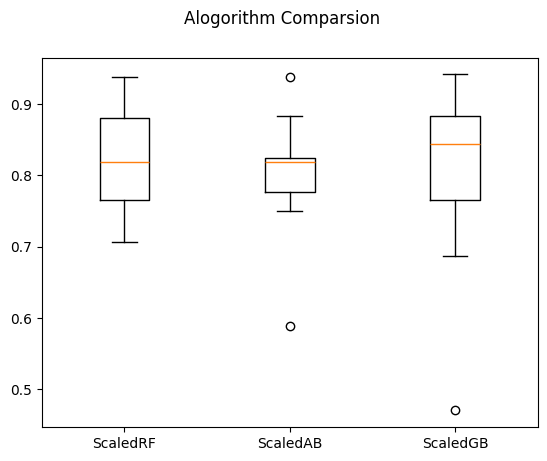

In [60]:
# Alogorithm Comparsion
fig = plt.figure()
fig.suptitle("Alogorithm Comparsion")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [61]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model =SVC(C= 1.7 , kernel = 'rbf')
model.fit(rescaledX , Y_train)

SVC(C=1.7)

In [64]:
rescaled_validationX = scaler.transform(X_validation)
predictions = model.predict(rescaled_validationX)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.9285714285714286
[[25  2]
 [ 1 14]]
              precision    recall  f1-score   support

           M       0.96      0.93      0.94        27
           R       0.88      0.93      0.90        15

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.92        42
weighted avg       0.93      0.93      0.93        42

